# aSPEM Experiment :defining a protocol




In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from  aSPEM import aSPEM
import time
timeStr = time.strftime("%Y-%m-%d_%H%M%S", time.localtime())
e = aSPEM(mode='pari', timeStr=timeStr)

In [2]:
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [3]:
print(e.print_protocol())

TODO


In [4]:
t_titre = 35
t_label = 25 
fig_width = 15

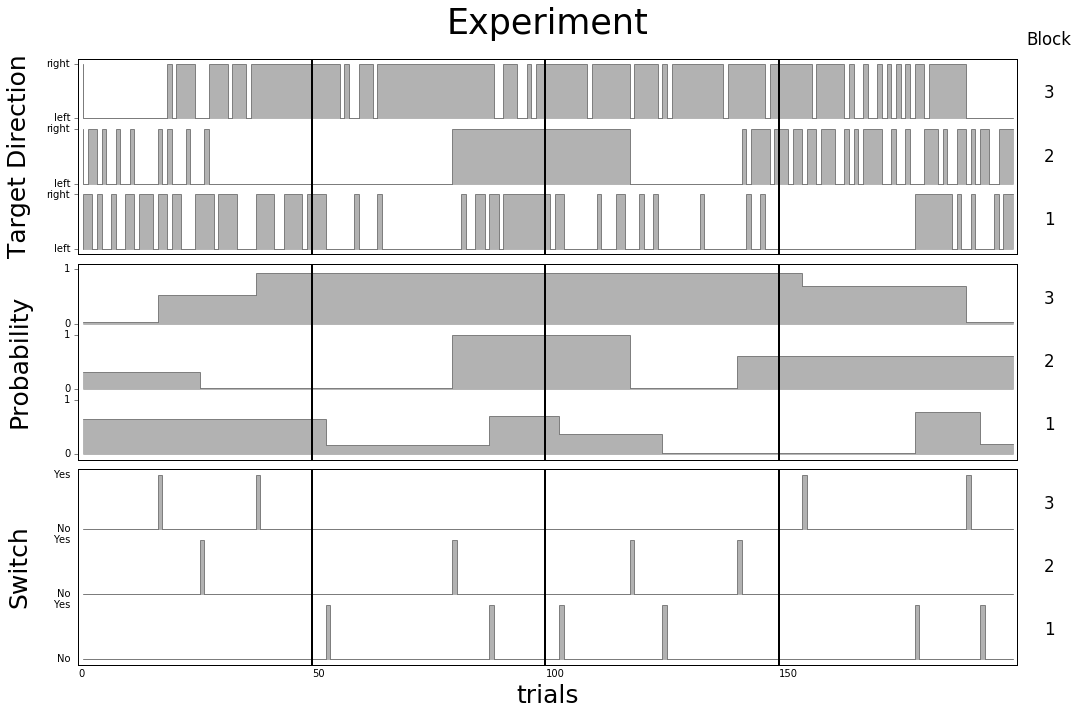

In [5]:
fig, axs, p = e.plot(fig_width=fig_width, t_titre=t_titre, t_label=t_label)

In [6]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [7]:
EXP = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in  ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN']:#,'YK']  :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            EXP.append(b)
PARAM = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in  ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN']:#,'YK']  :
        #a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            PARAM.append(b)

sujet = IP


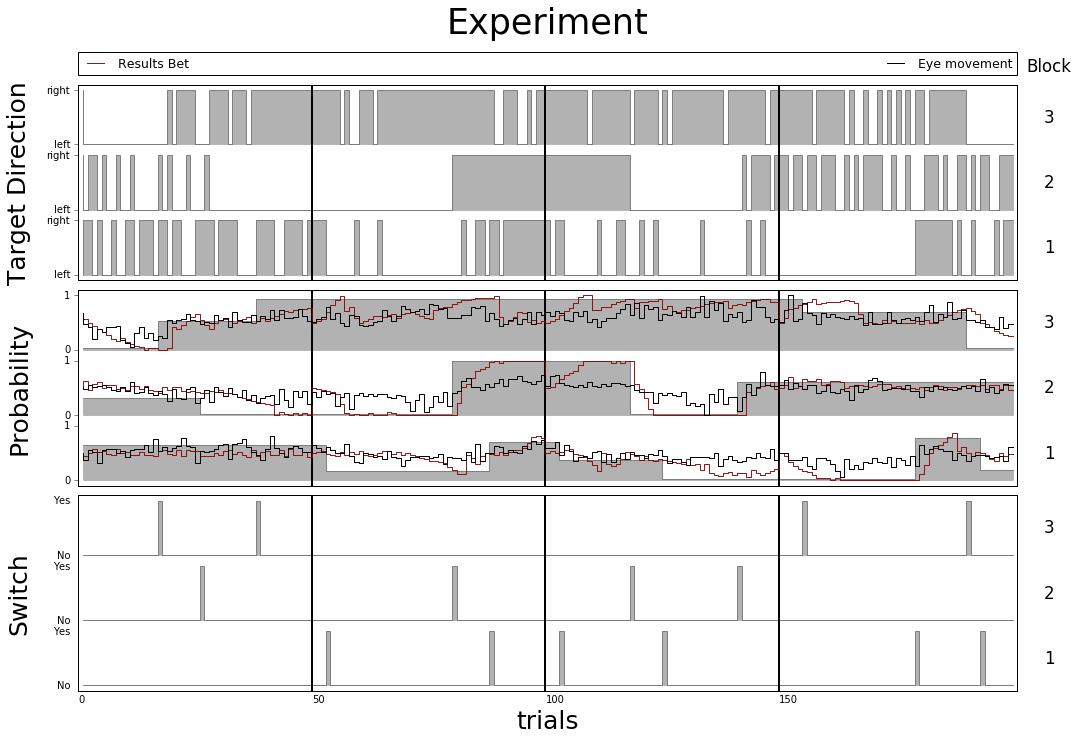

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
sujet = 5

print('sujet =', EXP[sujet]['observer'])
N_trials = EXP[sujet]['N_trials']
N_blocks = EXP[sujet]['N_blocks']
p = EXP[sujet]['p']
results = (EXP[sujet]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
v_anti = PARAM[sujet]['v_anti']
ec = 0.2

for i_layer, label in enumerate(['Target Direction', 'Probability', 'Switch']):
    for i_block in range(N_blocks):
        axs[i_layer].step(range(N_trials), p[:, i_block, i_layer]+i_block+ec*i_block, lw=1, c='k', alpha=.3)
        axs[i_layer].fill_between(range(N_trials), i_block+np.zeros_like(p[:, i_block, i_layer])+ec*i_block,
                                  i_block+p[:, i_block, i_layer]+ec*i_block,
                                  lw=.5, alpha=.3, facecolor='k', step='pre')
    
    axs[i_layer].set_xlim(-1, N_trials)#(-.05, N_trials +0.05)
    
    if i_layer==2 :
        axs[i_layer].set_xticks([-1, 49, 99,149])
        axs[i_layer].set_xticklabels([0, 50, 100, 150], ha='left')
        axs[i_layer].yaxis.set_tick_params(width=0)
        axs[i_layer].xaxis.set_ticks_position('bottom')
    else :
        axs[i_layer].set_xticks([])
 
    axs[i_layer].set_ylim(-(ec/2), N_blocks +ec*3-(ec/2))
    axs[i_layer].set_ylabel(label, fontsize=t_label)
    axs[i_layer].set_yticks([0, 1, 1+ec, 2+ec, 2+ec*2, 3+ec*2])
    axs[i_layer].yaxis.set_label_coords(-0.05, 0.5)
    axs[i_layer].yaxis.set_tick_params(direction='out')
    axs[i_layer].yaxis.set_ticks_position('left')

    
    axs[i_layer].bar(49, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[i_layer].bar(99, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[i_layer].bar(149, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)

    #------------------------------------------------
    ax_block = axs[i_layer].twinx()
    if i_layer==0 :
        ax_block.set_ylabel('Block', fontsize=t_label/1.5, rotation='horizontal', ha='left', va='bottom')
        ax_block.yaxis.set_label_coords(1.01, 1.05)

    ax_block.set_ylim(0, N_blocks)
    ax_block.set_yticks(np.arange(N_blocks)+0.5)
    ax_block.set_yticklabels(np.arange(N_blocks)+1, fontsize=t_label/1.5)
    ax_block.yaxis.set_tick_params(width=0, pad=(t_label/1.5)+10)
    #------------------------------------------------

    
for block in range(N_blocks):
    
    if block == 0 :
        axs[1].step(range(N_trials), block+results[:, block]+ec*block, lw=1, alpha=.9,
                    color='darkred', label='Results Bet')
        axs[1].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block, 
                    color='k', lw=1, alpha=1, label='Eye movement')
    else :
        axs[1].step(range(N_trials), block+results[:, block]+ec*block, lw=1, alpha=.9, color='darkred')
        axs[1].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                    color='k', lw=1, alpha=1)

axs[1].legend(fontsize=t_label/2, bbox_to_anchor=(0., 2.1, 1, 0.), loc=3, ncol=2,
              mode="expand", borderaxespad=0.)

fig.tight_layout()
plt.subplots_adjust(hspace=0.05)
axs[0].set_yticklabels(['left','right','left','right','left','right'])
axs[1].set_yticklabels(['0','1','0','1','0','1'])
axs[2].set_yticklabels(['No','Yes','No','Yes','No','Yes'])
axs[-1].set_xlabel('trials', fontsize=t_label);
axs[0].set_title('Experiment', fontsize=t_titre, x=0.5, y=1.2,va='bottom')
plt.show()